In [1]:
from time import localtime
from random import randint

def time_show():
    return str(localtime()[3]) + 'h' + str(localtime()[4])

def sum_list(LL):
    s = []
    for li in LL:
        s += li
    return s

def conv_list(L):
    if len(L) == 0:
        return Polyhedron()
    else:
        return Polyhedron(vertices = sum_list([[v.vector() for v in P.vertices()] for P in L]),
                          rays = sum_list([[r.vector() for r in P.rays()] for P in L]))

def higher_Voronoid(A, k):
    """`A` should be list of vectors. Very not optimized"""
    if k == 1:
        R = VoronoiDiagram(A).regions()
        return {Set([A.index(vector(p))]) : R[p] for p in R}
    VD_ = higher_Voronoid(A, k-1)
    VVD = {Y : [] for Y in Subsets(range(len(A)), k)}
    for X in VD_:
        Q = VD_[X]
        AX = [A[i] for i in range(len(A)) if not i in X]
        R = VoronoiDiagram(AX).regions()
        for p in R:
            Y = X.union(Set([A.index(vector(p))]))
            VVD[Y].append(Q.intersection(R[p]))
    #print(VVD)
    VD = {Y: conv_list(VVD[Y]) for Y in VVD if len(VVD[Y]) != 0}
    return {Y: VD[Y] for Y in VD if VD[Y].dimension() == len(A[0])}

def Voronoid_sequence(A, k = -1):
    """`A` should be list of vectors. Very not optimized"""
    if k == -1:
        k = len(A)
    if k == 1:
        R = VoronoiDiagram(A).regions()
        return [{Set([A.index(vector(p))]) : R[p] for p in R}]
    Seq_VD = Voronoid_sequence(A, k-1)
    VD_ = Seq_VD[-1]
    VVD = {Y : [] for Y in Subsets(range(len(A)), k)}
    for X in VD_:
        Q = VD_[X]
        AX = [A[i] for i in range(len(A)) if not i in X]
        R = VoronoiDiagram(AX).regions()
        for p in R:
            Y = X.union(Set([A.index(vector(p))]))
            VVD[Y].append(Q.intersection(R[p]))
    #print(VVD)
    VD = {Y: conv_list(VVD[Y]) for Y in VVD if len(VVD[Y]) != 0}
    return Seq_VD + [{Y: VD[Y] for Y in VD if VD[Y].dimension() == len(A[0])}]

def Voronoid_numbers(A, k = -1):
    return [len(VD) for VD in Voronoid_sequence(A, k)]

def plot_VoronoidDiagram(VD):
    x_min = min(min(v.vector()[0] for v in VD[X].vertices()) for X in VD) - 0.25
    y_min = min(min(v.vector()[1] for v in VD[X].vertices()) for X in VD) - 0.25
    x_max = max(max(v.vector()[0] for v in VD[X].vertices()) for X in VD) + 0.25
    y_max = max(max(v.vector()[1] for v in VD[X].vertices()) for X in VD) + 0.25

    sum(VD[X].plot() for X in VD).show(xmin=x_min,xmax=x_max,ymin=y_min,ymax=y_max, aspect_ratio=1)
    return None

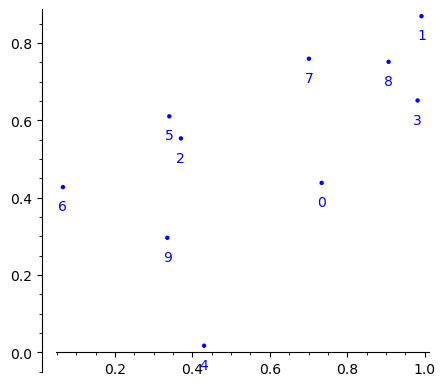

[10, 21, 25, 28, 26, 25, 19, 14, 6, 1]


In [164]:
nbr_pts = 10
box_size = 1000

A = [vector((randint(0, box_size)/box_size, randint(0, box_size)/box_size)) for _ in range(nbr_pts)]
Q = sum(plot(point(A[i], color='blue')) for i in range(len(A))) + sum(plot(text(str(i), A[i]+vector((0, -0.05)), color='blue')) for i in range(len(A)))
Q.show(aspect_ratio=1)

print(Voronoid_numbers(A))

1h26 0
1h26 10
1h26 20
1h27 30
1h28 40
[10, 209/10, 133/5, 1429/50, 1363/50, 1187/50, 921/50, 62/5, 61/10]


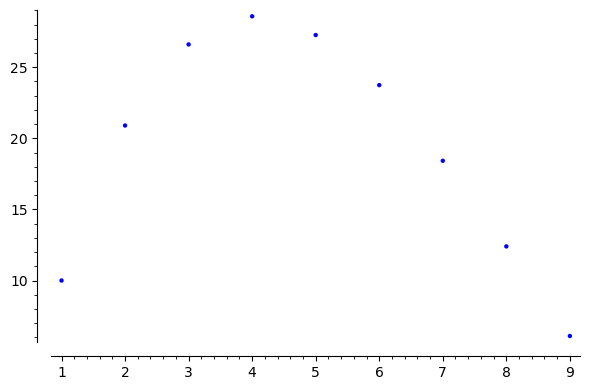

In [165]:
nbr_pts, nbr_tests = 10, 50
box_size = 1000

N = [0 for _ in range(nbr_pts-1)]

for i in range(nbr_tests):
    if i % 10 == 0:
        print(time_show(), i)
    A = [vector((randint(0, box_size)/box_size, randint(0, box_size)/box_size)) for _ in range(nbr_pts)]
    VA = Voronoid_numbers(A, nbr_pts-1)
    for i in range(nbr_pts-1):
        N[i] += VA[i]
N = [x/nbr_tests for x in N]
print(N)
list_plot([(i+1, N[i]) for i in range(len(N))]).show()

1h39 0
1h42 5
1h45 10
1h47 15
1h50 20
1h53 25
1h56 30
1h59 35
2h0 40
2h2 45
[15, 878/25, 1224/25, 2867/50, 1548/25, 1579/25, 1539/25, 2849/50, 1261/25, 1071/25, 1703/50, 1233/50, 376/25, 172/25]


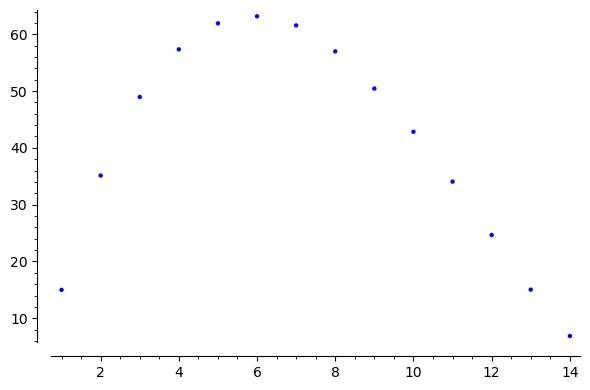

In [166]:
nbr_pts, nbr_tests = 15, 50
box_size = 1000

N = [0 for _ in range(nbr_pts-1)]

for i in range(nbr_tests):
    if i % 5 == 0:
        print(time_show(), i)
    A = [vector((randint(0, box_size)/box_size, randint(0, box_size)/box_size)) for _ in range(nbr_pts)]
    VA = Voronoid_numbers(A, nbr_pts-1)
    for i in range(nbr_pts-1):
        N[i] += VA[i]
N = [x/nbr_tests for x in N]
print(N)
list_plot([(i+1, N[i]) for i in range(len(N))]).show()

13h31 0
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
13h36 2
[1.6, 3.88, 5.56, 6.96, 7.96, 8.44, 8.72, 8.92, 8.56, 8.36, 7.72, 7.2, 6.2, 5.44, 4.44, 3.32, 2.4, 1.56, 0.68]
13h43 4
[3.2, 7.92, 11.44, 14.0, 16.04, 17.04, 17.64, 17.84, 17.16, 16.48, 15.68, 14.36, 12.4, 10.68, 8.72, 6.52, 4.72, 2.8, 1.2]
13h48 6
[4.8, 11.84, 17.08, 21.04, 24.2, 25.6, 26.24, 26.6, 25.88, 24.92, 23.32, 21.4, 18.76, 16.24, 13.04, 9.64, 7.04, 4.28, 1.84]
13h54 8
[6.4, 15.76, 22.84, 27.92, 31.88, 33.76, 34.72, 35.28, 34.6, 33.32, 31.0, 28.44, 25.2, 21.92, 17.76, 13.24, 9.52, 5.64, 2.48]
14h0 10
[8.0, 19.64, 28.6, 35.12, 39.88, 42.4, 43.64, 44.36, 43.44, 41.6, 38.8, 35.36, 31.24, 27.16, 22.0, 16.52, 11.68, 7.0, 3.16]
14h7 12
[9.6, 23.52, 34.08, 42.0, 47.6, 50.84, 52.52, 53.36, 52.24, 49.84, 46.64, 42.32, 37.36, 32.44, 26.44, 20.08, 14.16, 8.64, 3.84]
14h12 14
[11.2, 27.32, 39.52, 48.72, 55.28, 58.92, 61.12, 62.04, 60.92, 58.16, 54.4, 49.4, 43.8, 38.0, 31.24, 23.

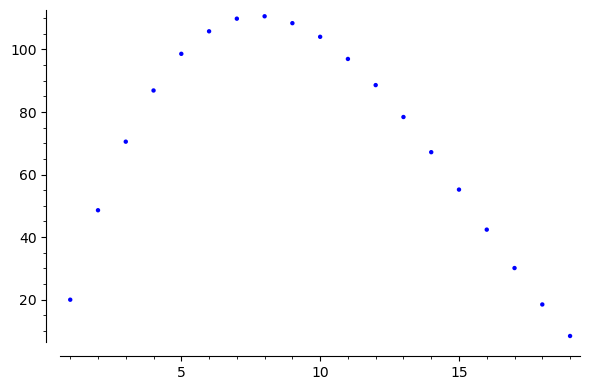

In [12]:
nbr_pts, nbr_tests = 20, 25
until = nbr_pts-1
box_size = 1000

N = [0 for _ in range(nbr_pts-1)]

for i in range(nbr_tests):
    if i % 2 == 0:
        print(time_show(), i)
        print([round(RR(x/i), 3) for x in N])
    A = [vector((randint(0, box_size)/box_size, randint(0, box_size)/box_size)) for _ in range(nbr_pts)]
    VA = Voronoid_numbers(A, until)
    for j in range(until):
        N[j] += VA[j]
N = [x/nbr_tests for x in N]
print(N)
list_plot([(j+1, N[i]) for j in range(len(N))]).show()

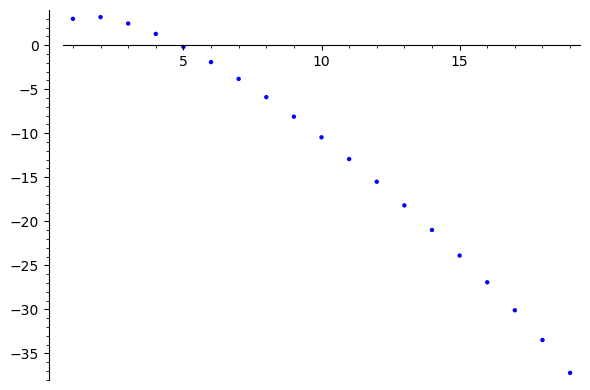

[3.0, 3.19, 2.46, 1.29, -0.2, -1.92, -3.83, -5.9, -8.12, -10.46, -12.93, -15.5, -18.19, -20.98, -23.89, -26.92, -30.1, -33.48, -37.21]


In [19]:
list_plot([(j+1, log((N[j])/factorial(j+1))) for j in range(len(N))]).show()
print([round(RR(log((N[j])/factorial(j+1))), 2) for j in range(len(N))])

19h25 start
19h28 1
[21.0, 50.0, 72.0, 89.0, 105.0, 113.0, 117.0, 119.0, 119.0, 114.0, 111.0, 106.0, 95.0, 85.0, 73.0, 59.0, 45.0, 35.0, 22.0, 10.0]
19h32 2
[21.0, 51.0, 74.0, 91.5, 105.0, 112.0, 116.0, 118.0, 117.0, 113.5, 111.0, 106.5, 97.0, 86.0, 74.0, 60.0, 45.0, 32.5, 20.0, 9.0]
19h36 3
[21.0, 51.0, 74.333, 92.0, 105.0, 110.0, 113.667, 116.667, 116.667, 114.333, 111.0, 105.667, 97.333, 87.333, 76.333, 62.0, 45.0, 32.0, 19.667, 9.0]
19h39 4
[21.0, 51.0, 74.25, 92.5, 106.25, 112.5, 116.0, 118.5, 119.5, 116.25, 111.0, 103.75, 94.5, 85.5, 74.0, 59.5, 43.75, 31.5, 19.75, 9.0]
19h42 5
[21.0, 51.0, 74.2, 92.6, 106.2, 114.0, 118.6, 120.4, 120.8, 117.2, 111.0, 102.8, 93.2, 83.6, 71.4, 58.0, 43.8, 31.4, 19.8, 9.0]
19h46 6
[21.0, 51.167, 74.167, 92.333, 106.167, 114.833, 119.5, 121.667, 121.667, 118.0, 111.0, 102.0, 92.333, 82.333, 70.5, 57.167, 43.833, 31.667, 19.833, 8.833]
19h49 7
[21.0, 51.143, 74.143, 92.429, 106.429, 115.143, 119.714, 122.0, 122.143, 118.286, 111.0, 101.714, 91.857, 82

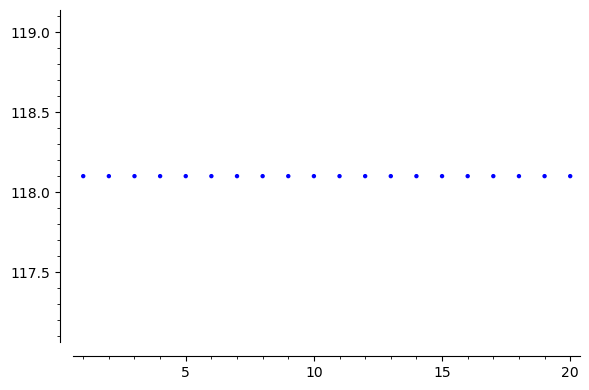

In [4]:
nbr_pts, nbr_tests = 21, 10
until = nbr_pts-1
box_size = 1000

N = [0 for _ in range(nbr_pts-1)]

print(time_show(), 'start')
for i in range(nbr_tests):
    if i != 0:
        print(time_show(), i)
        print([round(RR(x/i), 3) for x in N])
    A = [vector((randint(0, box_size)/box_size, randint(0, box_size)/box_size)) for _ in range(nbr_pts)]
    VA = Voronoid_numbers(A, until)
    for j in range(until):
        N[j] += VA[j]
N = [x/nbr_tests for x in N]
print(N)
list_plot([(j+1, N[j]) for j in range(len(N))]).show()

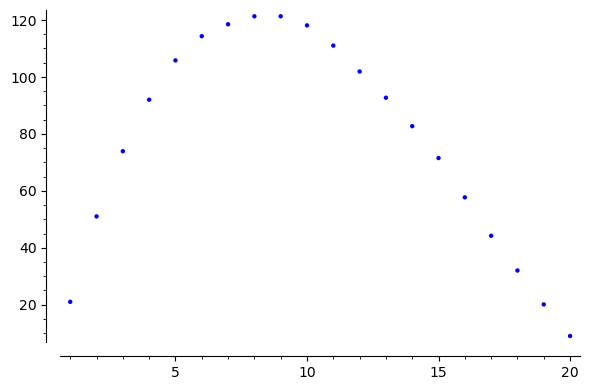

In [5]:
list_plot([(j+1, N[j]) for j in range(len(N))]).show()

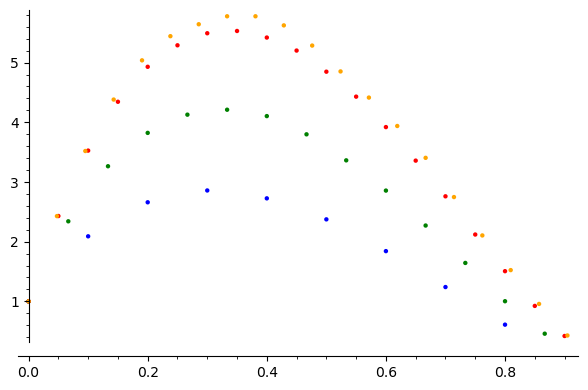

In [10]:
Data = {10 : [10, 209/10, 133/5, 1429/50, 1363/50, 1187/50, 921/50, 62/5, 61/10],
15 : [15, 878/25, 1224/25, 2867/50, 1548/25, 1579/25, 1539/25, 2849/50, 1261/25, 1071/25, 1703/50, 1233/50, 376/25, 172/25],
20 : [20, 243/5, 1763/25, 2172/25, 493/5, 529/5, 2746/25, 553/5, 542/5, 2601/25, 2424/25, 443/5, 392/5, 1679/25, 276/5, 212/5, 753/25, 462/25, 42/5],
21 : [21, 51, 739/10, 92, 529/5, 1143/10, 237/2, 1213/10, 1213/10, 1181/10, 111, 1019/10, 927/10, 827/10, 143/2, 577/10, 221/5, 32, 201/10, 9]}

data = {n : [(j/n, Data[n][j]/n) for j in range(len(Data[n]))] for n in Data}
list_plot(data[10], color='blue') + list_plot(data[15], color='green') + list_plot(data[20], color='red') + list_plot(data[21], color='orange')

18


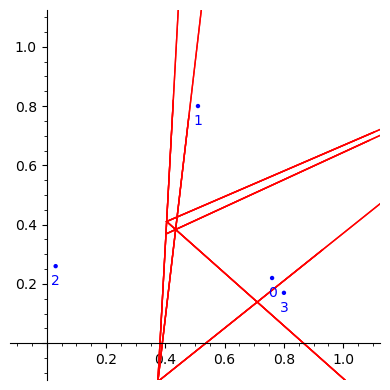

In [63]:
def ineq_A_i_better_j(A, i, j):
    return [-1/2*(A[i].dot_product(A[i]) - A[j].dot_product(A[j]))] + list(A[i] - A[j])

PP = []

for sig in Permutations(range(nbr_pts)):
    S = []
    for i, j in Subsets(range(len(A)), 2):
        if sig[i] <= sig[j]:
            S.append((i, j))
        else:
            S.append((j, i))
    Psig = Polyhedron(ieqs = [ineq_A_i_better_j(A, s[0], s[1]) for s in S])
    if Psig.dim() == 2:
        if not Psig in PP:
            PP.append(Psig)
            #print(len(PP))
        for e in Psig.faces(1):
            if len(e.rays()) == 0:
                Q += plot(line((e.vertices()[0].vector(), e.vertices()[1].vector()), color='red'))
            else:
                u = e.vertices()[0].vector()
                r = e.rays()[0].vector()
                v = u + r/sum(r)
                Q += plot(line((u, v), color='red'))
print(len(PP))
Q.show(xmin=-.1,xmax=1.1,ymin=-.1,ymax=1.1, aspect_ratio=1)

In [16]:
print(type(Q))
type(Psig.plot())

<class 'NoneType'>


<class 'sage.plot.graphics.Graphics'>

In [79]:
print(A)
VD = VoronoiDiagram(A)
R = VD.regions()
for r in R:
    print(A.index(vector(r)))
#VD.plot().show(xmin=-.1,xmax=1.1,ymin=-.1,ymax=1.1, aspect_ratio=1)

[(19/25, 11/50), (51/100, 4/5), (3/100, 13/50), (4/5, 17/100)]
0
1
2
3


In [152]:
Voronoid_numbers(A)

[6, 10, 12, 7, 5, 1]

In [146]:
VD = higher_Voronoid(A, 2)
for X in VD:
    print(X, VD[X])
    print([(round(RR(v.vector()[0]), 3), round(RR(v.vector()[1]), 3)) for v in VD[X].vertices()])

{0, 1} A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 2 vertices and 2 rays
[(0.395, 0.374), (0.489, 0.658)]
{0, 2} A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 4 vertices
[(-3.333, 4.687), (-0.035, 0.489), (0.489, 0.658), (0.395, 0.374)]
{0, 3} A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 2 vertices and 2 rays
[(-0.035, 0.489), (0.395, 0.374)]
{1, 2} A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 2 vertices and 2 rays
[(-3.333, 4.687), (0.489, 0.658)]
{2, 3} A 2-dimensional polyhedron in QQ^2 defined as the convex hull of 2 vertices and 2 rays
[(-3.333, 4.687), (-0.035, 0.489)]


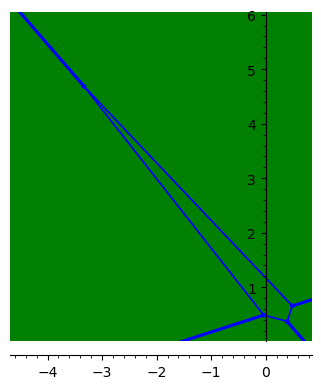

In [148]:
x_min = min(min(v.vector()[0] for v in VD[X].vertices()) for X in VD) - 0.25
y_min = min(min(v.vector()[1] for v in VD[X].vertices()) for X in VD) - 0.25
x_max = max(max(v.vector()[0] for v in VD[X].vertices()) for X in VD) + 0.25
y_max = max(max(v.vector()[1] for v in VD[X].vertices()) for X in VD) + 0.25

sum(VD[X].plot() for X in VD).show(xmin=x_min,xmax=x_max,ymin=y_min,ymax=y_max, aspect_ratio=1)